# Energy minimisation
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Minimise energy by adjusting the probability distribution using Simulated Annealing**

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [70]:
# Define shannon entropy function
def shannon_entropy(probabilities):
    # Remove any zero probabilities to avoid log(0) issues
    probabilities = probabilities[probabilities != 0]
    return -np.sum(probabilities * np.log(probabilities))

# Define internal energy function
def energy_function(p, A):
    return np.sum(A * np.outer(p, p))

# Define simulated annealing for energy
def simulated_annealing_energy(desired_function, initial_probabilities, matrix, num_iterations, initial_temperature=1.0, cooling_rate=0.95):
    current_probabilities = initial_probabilities
    current_value = desired_function(current_probabilities, matrix)
    history = [current_value]

    for _ in range(num_iterations):
        temperature = initial_temperature * (cooling_rate ** _)

        # Generate a new set of probabilities
        new_probabilities = generate_probability_list(len(current_probabilities))

        # Evaluate the entropy of the new set of probabilities
        new_value = desired_function(new_probabilities, matrix)

        # Accept the new set of probabilities if its entropy is greater
        if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):
            current_probabilities = new_probabilities
            current_value = new_value

        history.append(current_value)

    return history

# Define simulated annealing for entropy
def simulated_annealing_entropy(initial_probabilities, num_iterations, initial_temperature=1.0, cooling_rate=0.95):
    current_probabilities = initial_probabilities
    current_entropy = shannon_entropy(current_probabilities)
    entropy_history = [current_entropy]

    for _ in range(num_iterations):
        temperature = initial_temperature * (cooling_rate ** _)

        # Generate a new set of probabilities
        new_probabilities = generate_probability_list(len(current_probabilities))

        # Evaluate the entropy of the new set of probabilities
        new_entropy = shannon_entropy(new_probabilities)

        # Accept the new set of probabilities if its entropy is greater
        if new_entropy > current_entropy or np.random.rand() < np.exp((new_entropy - current_entropy) / temperature):
            current_probabilities = new_probabilities
            current_entropy = new_entropy

        entropy_history.append(current_entropy)

    return entropy_history

# Define random probability generator
def generate_probability_list(size):
    # Generate a list of random numbers
    random_numbers = np.random.rand(size)

    # Normalize the list to make it a probability distribution
    probabilities = random_numbers / np.sum(random_numbers)

    return probabilities

In [73]:
# Example for generating energy and entropy data from a given matrix
test_matrix = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])
list_size = len(test_matrix)
num_runs = 100
num_iterations = 1000
energy_history = []
entropy_history = []

# Run multiple times
for _ in range(num_runs):
    # Minimum internal energy with simulated annealing
    initial_probabilities_energy = generate_probability_list(list_size)
    min_energy = simulated_annealing_energy(energy_function, initial_probabilities_energy, test_matrix, num_iterations)
    energy_history.append(min_energy)

    # Maximum shannon entropy with simulated annealing
    initial_probabilities_entropy = generate_probability_list(list_size)
    max_entropy = simulated_annealing_entropy(initial_probabilities_entropy, num_iterations)
    entropy_history.append(max_entropy)

# Generate averaged list of entropy_histories
entropy_history = np.array(entropy_history)
entropy_history_averaged = np.mean(entropy_history, axis=0)

# Generate averaged list of energies_optimization_SA
energy_history = np.array(energy_history)
energy_history_averaged = np.mean(energy_history, axis=0)

C:\Users\cyril\AppData\Local\Temp\ipykernel_12600\2124815570.py:27: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


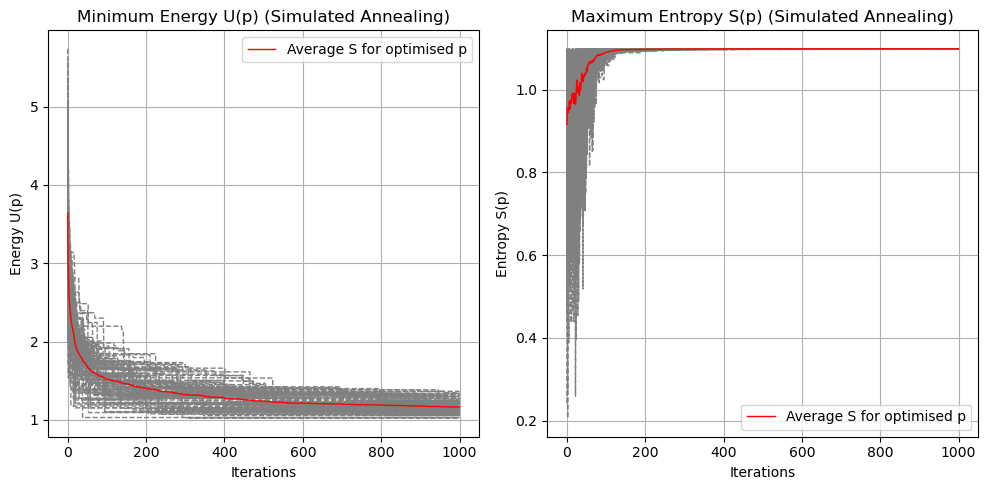

In [74]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
for i in range(0, len(energy_history)):
    plt.plot(energy_history[i], color='grey', linestyle='--', linewidth=1)
plt.plot(energy_history_averaged, color='red', linestyle='-', linewidth=1, label = 'Average S for optimised p')
plt.title('Minimum Energy U(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Energy U(p)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(0, len(entropy_history)):
    plt.plot(entropy_history[i], color='grey', linestyle='--', linewidth=1)
plt.plot(entropy_history_averaged, color='red', linestyle='-', linewidth=1, label = 'Average S for optimised p')
plt.title('Maximum Entropy S(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Entropy S(p)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()